# Udacity Data Scientist for Enterprise Nanodegree Capstone project
### Collin Zheng

# Business understanding and scope:

**Deliverable**: Executable model script (.pkl)<br>

**Machine learning task**: Classification.<br>

**Target variable**: Status (Employed/Left).<br>

**Metrics**: Imbalanced dataset; use AUROC.

**Available features in original dataset**:<br>
*Admin info*
- **department**
- **salary**: categorical and relative to other employees in their department
- **tenure**: number of years at company
- **recently_promoted** (proxy for job performance): period is last 3 years

*Workload info*
- **n_projects**: number of projects employee is currently working on
- **avg_monthly_hrs**: average monthly hours worked

*Mutual evaluation info*
- **satisfaction**: higher is better
- **last_evaluation** (proxy for job performance): higher is better
- **filed complaint** (proxy for satisfaction): time period is last 3 years




# EDA:

### Import packages and load data:

In [326]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [327]:
df = pd.read_csv('employee_data.csv')

### Basic exploration of dataset:

In [328]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [329]:
df.shape

(14249, 10)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
avg_monthly_hrs      14249 non-null int64
department           13540 non-null object
filed_complaint      2058 non-null float64
last_evaluation      12717 non-null float64
n_projects           14249 non-null int64
recently_promoted    300 non-null float64
salary               14249 non-null object
satisfaction         14068 non-null float64
status               14249 non-null object
tenure               14068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [331]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd4224ba8>,
      dtype=object)

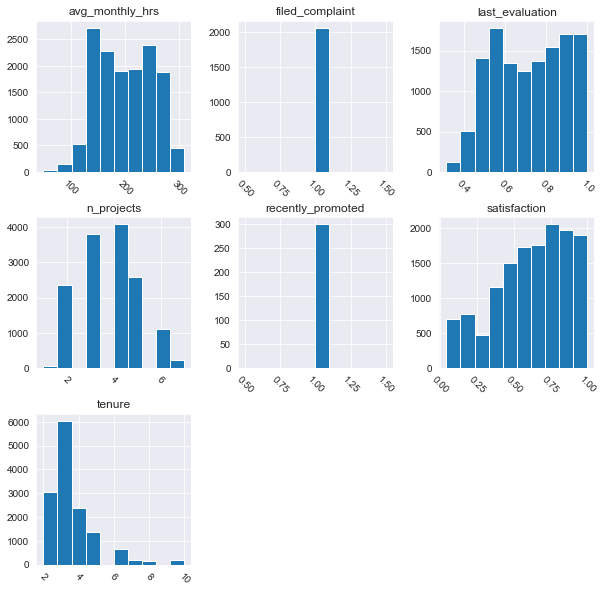

In [332]:
df.hist(figsize=(10,10), xrot=-45)

In [333]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [334]:
corr = df.corr()

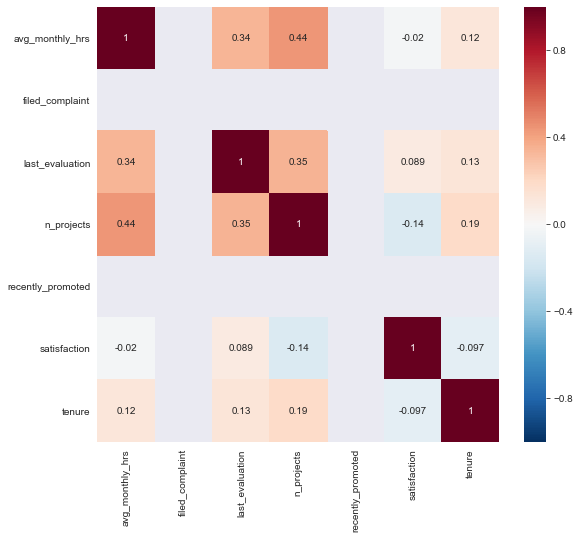

In [335]:
plt.figure(figsize=(9,8))
sb.heatmap(corr,
          annot=True,
          cmap='RdBu_r',
          vmin=-1,
          vmax=1)
plt.show()

### Let's check out the stats for just the categorical features

In [336]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


### Both department and salary have missing values.
### Bar plots for each of these categorical features:

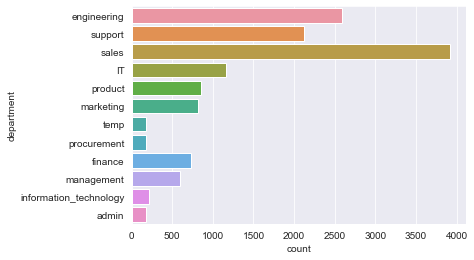

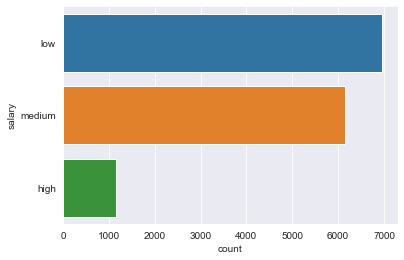

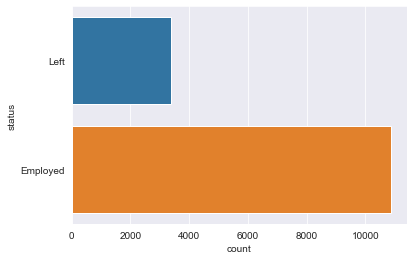

In [337]:
for feature in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(y=feature, data=df)
    plt.show()

### Sparse classes? Nah. But we do have some data out of scope. I.e. Temps. Also, Information Technology and IT are same.

### What's the workload for different departments? Groupby.

In [338]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs', ascending=False)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
department,,,,,,,
engineering,202.469522,1.0,0.722332,3.872299,1.0,0.617907,3.402392
IT,202.175711,1.0,0.720712,3.806202,1.0,0.628324,3.481481
information_technology,202.167464,1.0,0.716156,3.832536,1.0,0.626717,3.315789
admin,201.272727,1.0,0.726282,3.897727,1.0,0.611450,3.369318
finance,201.175824,1.0,0.723880,3.815934,1.0,0.586787,3.543956
management,201.025210,1.0,0.729714,3.857143,1.0,0.630428,4.294118
support,200.975495,1.0,0.723200,3.804430,1.0,0.626923,3.394910
sales,200.842467,1.0,0.711254,3.772878,1.0,0.623075,3.527148
product,199.991860,1.0,0.719616,3.817442,NaN,0.628774,3.487209


### Eng and IT takes it. Not a surprise!

### Satisfaction might be important for determining whether employee leaves or not. Let's segment satisfaction by some other features to see relationships.

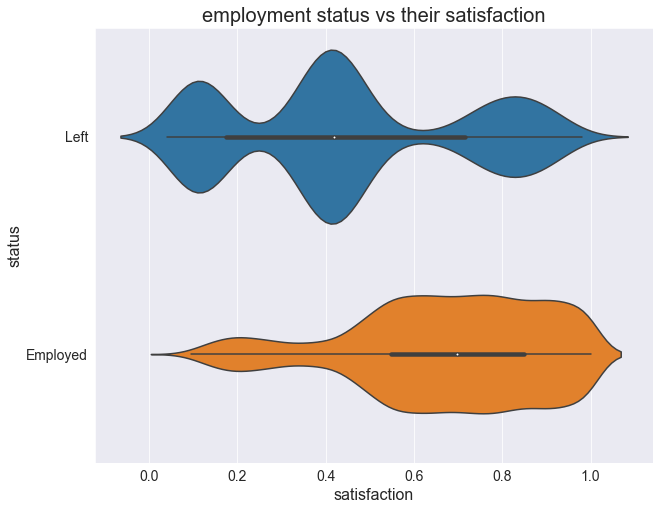

In [339]:
plt.figure(figsize=(10,8))
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("satisfaction", fontsize=16)
plt.ylabel("status", fontsize=16)
plt.title("employment status vs their satisfaction", fontsize=20)
sns.violinplot(y='status', x='satisfaction', data=df)
plt.savefig('data_prep_status_vs_satisfaction.jpg', format='jpg')
plt.show()

### Those currently employed are largely satisfied with their jobs. Not a surprise. BUT those who have left also include highly satisfied employees. Let's do a bivariate segmentation to investigate further. We'll segment satisfaction and last_evaluation (proxy for performance) by status.

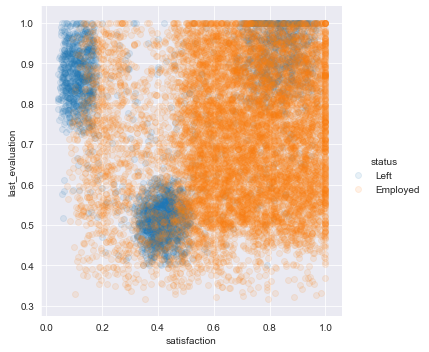

In [340]:
sns.lmplot(x='satisfaction',
          y='last_evaluation',
          hue='status',
          data=df,
          fit_reg=False,
          scatter_kws={'alpha':0.1})
plt.show()

### Do it just for those who have left the company.

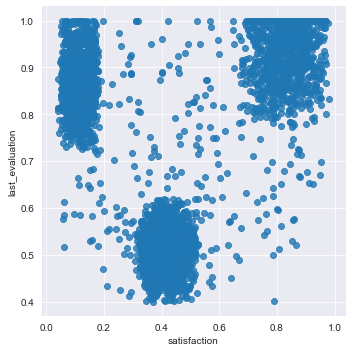

In [341]:
sns.lmplot(x='satisfaction',
          y='last_evaluation',
          data=df[df.status=='Left'],
          fit_reg=False)
plt.show()

### Interesting: we have three clusters. Will want to engineer these three features later during data processing.

### Feature engineering idea:
### "Underperformers: for last_evaluation < 0.6
### "Unhappy" for satisfaction_level < 0.2... maybe they are overqualified?
### "Overachievers" last_evaluation > 0.8 and satisfaction > 0.7

### Segment last_evaluation (performance) and avg_monthly_hrs (workload) by status

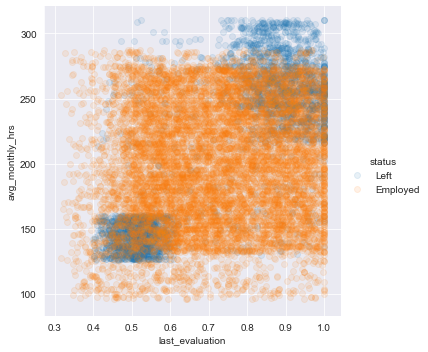

In [342]:
sb.lmplot(x='last_evaluation',
         y='avg_monthly_hrs',
         hue='status',
         data=df,
         fit_reg=False,
         scatter_kws={'alpha':0.1})
plt.show()

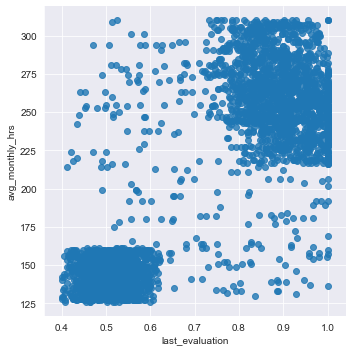

In [343]:
sb.lmplot(x='last_evaluation',
         y='avg_monthly_hrs',
         data=df[df.status=='Left'],
         fit_reg=False)
plt.show()

### FEature engineering idea:
### 'Stars' with avg_monthly_hrs > 215 and last_evaluation > 0.75
### 'Slackers' with avg_monthly_hrs < 165 and last_evaluation < 0.65

### Segment avg_monthly_hrs by status too.

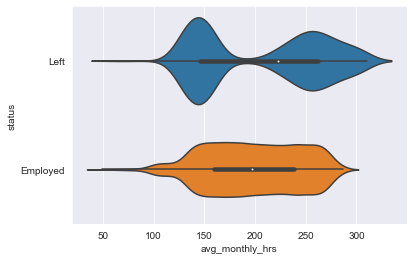

In [344]:
sb.violinplot(y='status', x='avg_monthly_hrs', data=df)
plt.show()

### Interesting: those who had left either had low or high hours.

### Segment last_evaluation by status too.

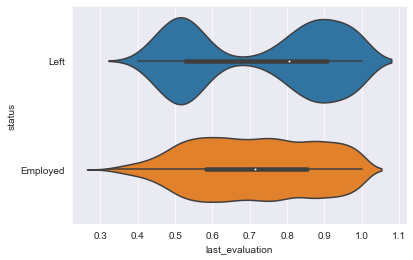

In [345]:
sb.violinplot(y='status', x='last_evaluation', data=df)
plt.show()

### Interesting: those who left had either bad or good performance.

# Data processing and feature engineering:

### Drop duplicates:

In [346]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(14249, 10)
(14221, 10)


### Missing values:

In [347]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12165
last_evaluation       1504
n_projects               0
recently_promoted    13921
salary                   0
satisfaction           153
status                   0
tenure                 153
dtype: int64

### department, filed_complaint, last_evaluation, recently_promoted, satisfaction and tenure have missing values.

### filed_complaint and recently_promoted are binary features whose NaN's mean 0. Let's clean those.

In [348]:
df.filed_complaint.unique()

array([nan,  1.])

In [349]:
df.filed_complaint.fillna(0, inplace=True)

In [350]:
df.filed_complaint.unique()

array([0., 1.])

In [351]:
df.recently_promoted.fillna(0, inplace=True)

In [352]:
df.recently_promoted.unique()

array([0., 1.])

In [353]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0


In [354]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1504
n_projects              0
recently_promoted       0
salary                  0
satisfaction          153
status                  0
tenure                153
dtype: int64

### Now we just have four features with missing values. There's no easy fix for these, so we'll leave it for now.

### Engineer numerical feature for salary ordinal feature:

In [355]:
df['salary_numeric'] = df.salary.replace({'low':0, 'medium':1, 'high':2})

In [356]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0


### We now have 8 numerical features. Let's do a correlation heatmap.

In [357]:
corr = df.corr()

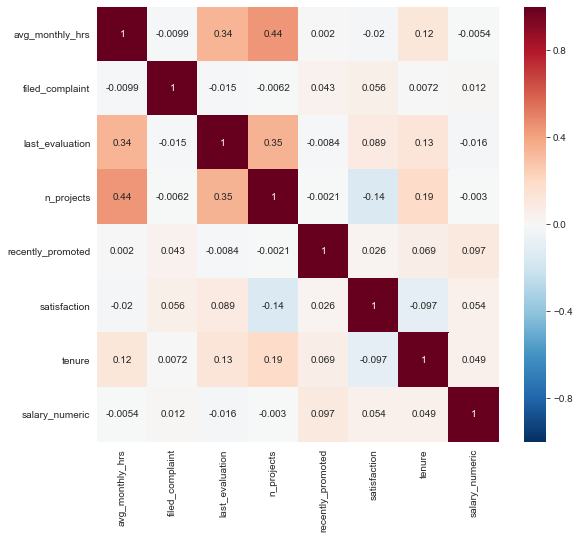

In [358]:
plt.figure(figsize=(9,8))
sb.heatmap(corr,
          annot=True,
          cmap='RdBu_r',
          vmin=-1,
          vmax=1)
plt.show()

### Get rid of salary_numeric as we'll get it via. get_dummies later

In [389]:
df.drop('salary_numeric', axis=1, inplace=True)
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,stars,slackers,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Some data cleaning:
### Combine information_technology and IT classes in department feature

In [359]:
df.department.replace('information_technology', 'IT', inplace=True)

### Remove temp class from department as that's out of scope.

In [360]:
df = df[df.department != 'temp']

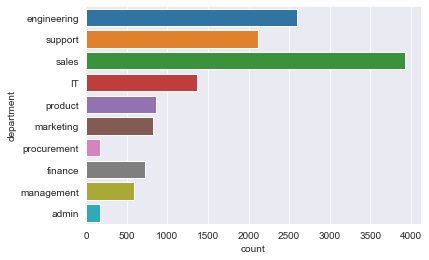

In [361]:
sb.countplot(y='department', data=df)
plt.show()

In [362]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
salary_numeric          0
dtype: int64

### Turns out our satisfaction and tenure missing values came from this temp class. Makes sense!
### Now we have just two features with missing values. Let's now label them as missing.

### department:

In [363]:
df['department'].fillna('Missing', inplace=True)

In [364]:
df.department.value_counts()

sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
Missing         709
management      595
admin           176
procurement     174
Name: department, dtype: int64

In [365]:
df.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
salary_numeric          0
dtype: int64

### last_evaluation_missing:

In [366]:
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [367]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric,last_evaluation_missing
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0


### fill in NaN with 0 so algorithms will run properly

In [368]:
df.last_evaluation.fillna(0, inplace=True)

In [369]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
salary_numeric             0
last_evaluation_missing    0
dtype: int64

### Engineer new features from segmentations

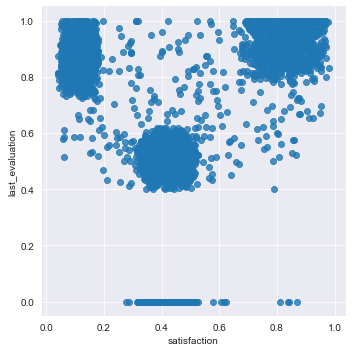

In [370]:
sb.lmplot(x='satisfaction',
         y='last_evaluation',
         data=df[df.status=='Left'],
         fit_reg=False)
plt.show()

### Feature engineering idea:
### "Underperformers: for last_evaluation < 0.6
### "Unhappy" for satisfaction_level < 0.2... maybe they are overqualified?
### "Overachievers" last_evaluation > 0.8 and satisfaction > 0.7

In [371]:
df['underperformer'] = ((df.last_evaluation < 0.6) & (df.last_evaluation_missing==0)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [372]:
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

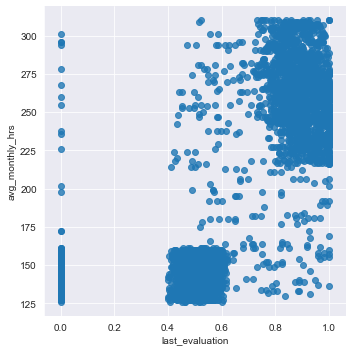

In [373]:
sb.lmplot(x='last_evaluation',
         y='avg_monthly_hrs',
         data=df[df.status=='Left'],
         fit_reg=False)
plt.show()

### FEature engineering idea:
### 'Stars' with avg_monthly_hrs > 215 and last_evaluation > 0.75
### 'Slackers' with avg_monthly_hrs < 165 and last_evaluation < 0.65

In [374]:
df['stars'] = ((df.last_evaluation > 0.75) & (df.avg_monthly_hrs > 215)).astype(int)
df['slackers'] = ((df.last_evaluation < 0.65) & (df.avg_monthly_hrs < 165)).astype(int)

In [380]:
df[['stars', 'slackers']].mean()

stars       0.241825
slackers    0.204151
dtype: float64

In [381]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric,last_evaluation_missing,underperformer,unhappy,overachiever,stars,slackers
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0,0,0,1,1,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,0,1,0,0,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1,0,0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,0,1,0,0,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0,0,0,1,1,0


### Convert status into dummy variable

In [382]:
df['status'] = pd.get_dummies(df.status).Left

In [383]:
df.status.mean()

0.23933750355416547

### Create dummy variables for the other two categorical variables: department and salary

In [385]:
df = pd.get_dummies(df, columns=['department', 'salary'])

In [390]:
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,stars,slackers,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Modelling:

# Results: